In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mu0 = 1.257 *10e-6
r = 0.01
A = np.pi*r**2
R = 5 # resistance in ohms
N = 10000
l = 0.02
# L = 0.1
L = mu0*(N*l)**2*A/l
m = 0.01
g = 9.81
x0 = 0.085
v0 = 5
x_stop = 0.005
k_he = 1 # Hall effect sensor scaling from B to V

n = 10000
ts = np.linspace(0, 1, n)
dt = ts[1] - ts[0]


i = np.zeros(n)
i_d = np.zeros(n)
v = np.ones(n)*v0
x = np.zeros(n)
x_d = np.zeros(n)
x_dd = np.zeros(n)
he_s = np.zeros(n) # Hall Effect Sensor

x[0] = x0


for j in np.linspace(start = 0,stop = n-2, num = n-1, dtype = int):     
    i_d[j] = (v[j] - R*i[j])/L
    i[j+1] = i[j] + dt*i_d[j]
    F_m = (-4*mu0*N*(r**2)*i[j]**2)/(2*x[j]**4)
    B = (mu0*N*(r**2)*i[j])/(2*x[j]**3)
    if x[j] <= x_stop:
        F_m = 0
        x_d[j] = 0
        he_s[j] = 0

    x_dd[j] = F_m/m + g
   
    x_d[j+1] = x_d[j] + dt*x_dd[j]
    x[j+1] = x[j] + dt*x_d[j]
    he_s[j+1] = k_he*B

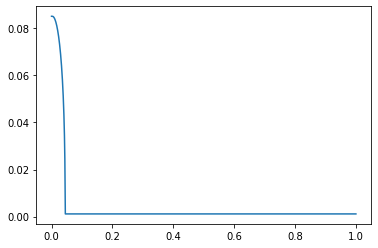

In [3]:
plt.figure()
plt.plot(ts, x)


In [4]:
print(np.linspace(start = 0,stop = n-2, num = n-1, dtype = int))

[   0    1    2 ... 9996 9997 9998]
